In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import math 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


It is evident that only 38.38 % of the population on the ship survived , rest died

In [6]:
df = train.copy()

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Male/Female

In [8]:
df.loc[(df.Survived == 1) & (df.Sex == "male") , :].count()

PassengerId    109
Survived       109
Pclass         109
Name           109
Sex            109
Age             93
SibSp          109
Parch          109
Ticket         109
Fare           109
Cabin           45
Embarked       109
dtype: int64

There were 109 males across the ship who survived that accident

In [9]:
df.loc[(df.Survived == 1) & (df.Sex == "female") , :].count()

PassengerId    233
Survived       233
Pclass         233
Name           233
Sex            233
Age            197
SibSp          233
Parch          233
Ticket         233
Fare           233
Cabin           91
Embarked       231
dtype: int64

There were 233 females across the ship who survived that accident

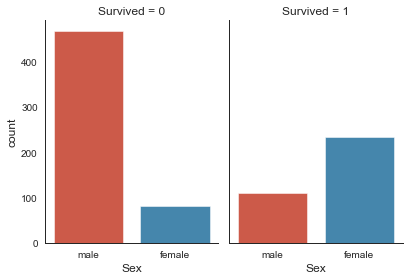

In [10]:
sns.factorplot(x="Sex",col="Survived", data=df , kind="count",size=4, aspect=.7);

This gives us the idea that males died more and females survived more

# Ticket Class

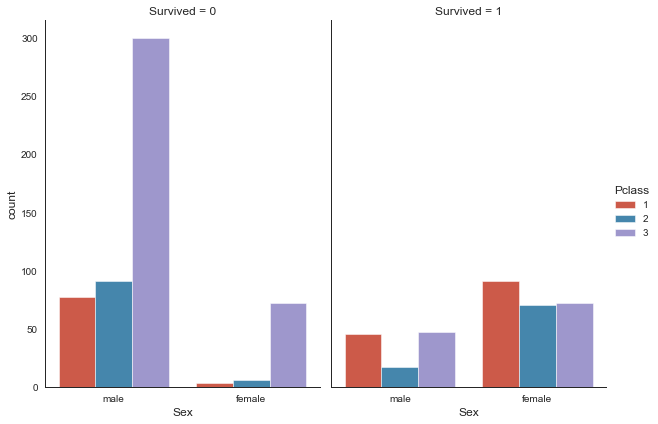

In [11]:
sns.factorplot(x="Sex", hue = "Pclass" , col="Survived", data=df , kind="count",size=6, aspect=.7);

In survived = 0,

* It is evident that in overall, the males and females of Pclass 3 died more than others

* The males and female of Pclass 3 showed a remarkable increase in death, showing increasing trend in death as class shifts down

In survived = 1, 

* Females showed a near fall down trend as expected but pclass=2 females survived less than the Pclass=3 females

* The males on contrary showed a dip in between i.e. in males who survived , Plass -->  3 > 1 > 2

In [12]:
df.loc[(df.Survived == 1) & (df.Sex == "male") & (df.Pclass == 1)].count()

PassengerId    45
Survived       45
Pclass         45
Name           45
Sex            45
Age            40
SibSp          45
Parch          45
Ticket         45
Fare           45
Cabin          39
Embarked       45
dtype: int64

In [13]:
df.loc[(df.Survived == 1) & (df.Sex == "male") & (df.Pclass == 2) , :].count()

PassengerId    17
Survived       17
Pclass         17
Name           17
Sex            17
Age            15
SibSp          17
Parch          17
Ticket         17
Fare           17
Cabin           4
Embarked       17
dtype: int64

In [14]:
df.loc[(df.Survived == 1) & (df.Sex == "male") & (df.Pclass == 3) , :].count()

PassengerId    47
Survived       47
Pclass         47
Name           47
Sex            47
Age            38
SibSp          47
Parch          47
Ticket         47
Fare           47
Cabin           2
Embarked       47
dtype: int64

In [15]:
pd.crosstab(df.Pclass, df.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Including both the sexes, 2nd class survived less than the other two clases

In [16]:
df.Survived[df.Pclass == 1].sum()/df[df.Pclass == 1].Survived.count()

0.6296296296296297

In [17]:
df.Survived[df.Pclass == 2].sum()/df[df.Pclass == 2].Survived.count()

0.47282608695652173

In [18]:
df.Survived[df.Pclass == 3].sum()/df[df.Pclass == 3].Survived.count()

0.24236252545824846

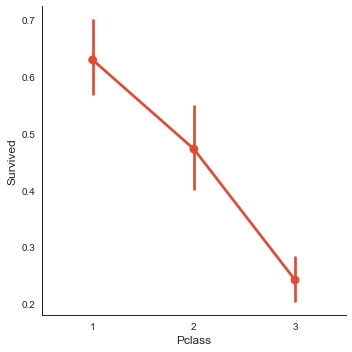

In [19]:
sns.factorplot(x='Pclass',y='Survived', kind="point" ,data=df)

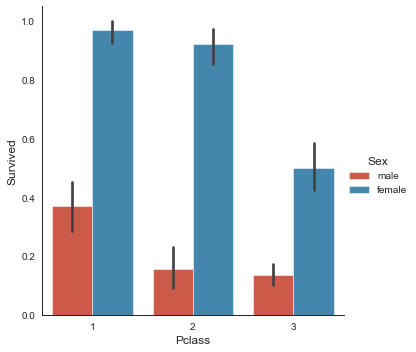

In [20]:
sns.factorplot('Pclass','Survived',kind="bar",hue='Sex',data=df)

In [21]:
pd.crosstab([df.Sex, df.Survived], df.Pclass, margins=True).style.background_gradient(cmap='autumn_r')

Almost all women in Pclass 1 and 2 survived and nearly all men in Pclass 2 and 3 died

# Embarked

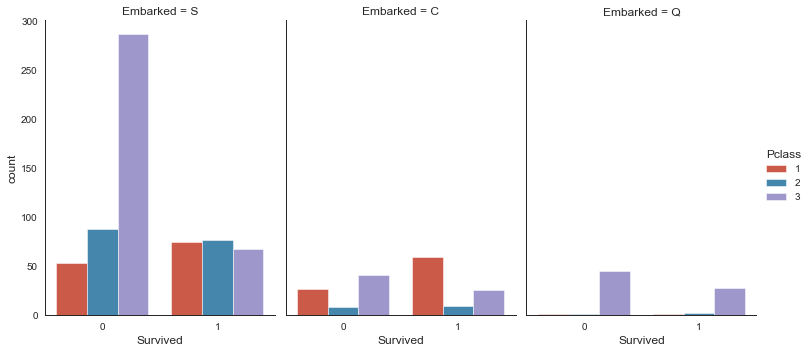

In [22]:
sns.factorplot(x="Survived",col="Embarked",data=df ,hue="Pclass", kind="count",size=5, aspect=.7);

This shows that those who were embarked S survived more than those who were embarked C and then Q

Most of the people who died were embarked S

Also, people survived with embarked Q were mostly from Plass 3 females

In [23]:
pd.crosstab([df.Survived], [df.Sex, df.Pclass, df.Embarked], margins=True).style.background_gradient(cmap='autumn_r')

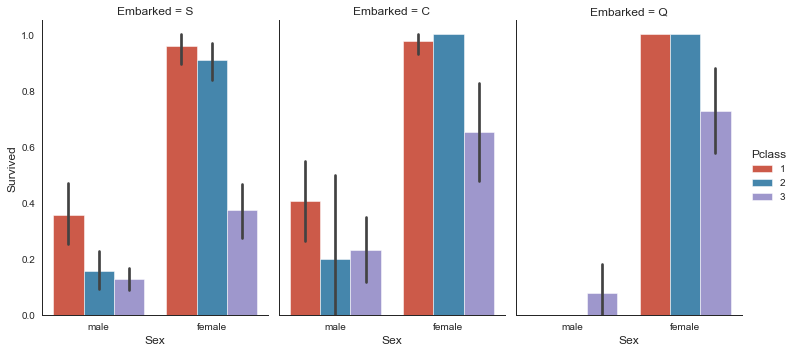

In [24]:
sns.factorplot(x="Sex", y="Survived",col="Embarked",data=df ,hue="Pclass",kind="bar",size=5, aspect=.7)

survived axis shows the % which means embarked Q males in Pclass 1 and 2 all died

embarked females in Pclass 1 and 2 all lived

In [25]:
context1 = {"female":0 , "male":1}
context2 = {"S":0 , "C":1 , "Q":2}
df['Sex_bool']=df.Sex.map(context1)
df["Embarked_bool"] = df.Embarked.map(context2)

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_bool,Embarked_bool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0.0


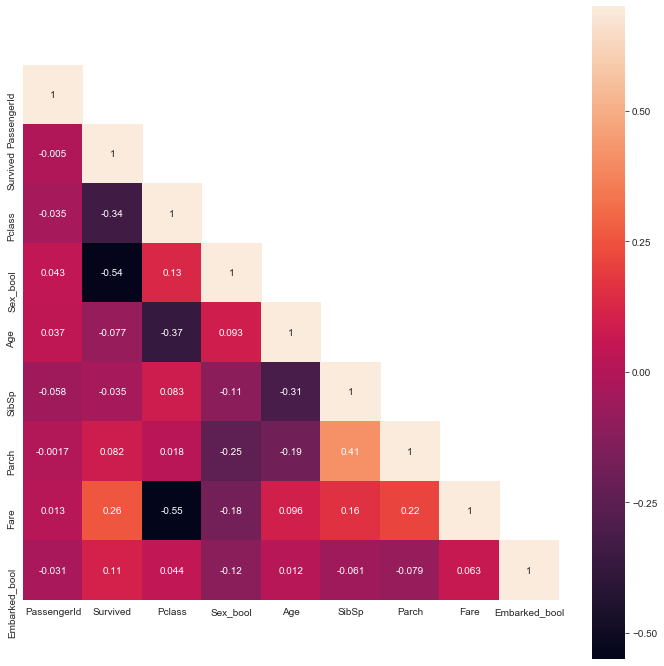

In [27]:
correlation_map = df[['PassengerId', 'Survived', 'Pclass', 'Sex_bool', 'Age', 'SibSp',
       'Parch', 'Fare' , 'Embarked_bool']].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(12,12)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)

* PassengerId is a redundant column as its very much less related to all other attributes , we can remove it

* Survived is related indirectly with Pclass and also we earlier proved that as Pclass value increases Survival decreases

* Pclass and Age are also inversely related and can also be proven by the following cell  that as Pclass decreases, the mean of the Age increases, means the much of the older travellers are travelling in high class
              
* Pclass and fare are also highly inversely related as the fare of Pclass 1 would obviously be higher than corresponding Pclass 2 and 3

* Also , people with lower ages or children are travelling with their sibling and parents more than higher aged people (following an inverse relation) , which is quite a bit obvious

* Parch and SibSp are also highly directly related

* Sex_bool and Survived people are highly inversely related , i.e. females are more likely to survive than men

In [28]:
df.groupby("Pclass").Age.mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [29]:
df.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
Sex_bool           0
Embarked_bool      2
dtype: int64

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_bool,Embarked_bool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0.0


In [31]:
for x in [train, test,df]:
    x['Age_bin']=np.nan
    for i in range(8,0,-1):
        x.loc[ x['Age'] <= i*10, 'Age_bin'] = i

In [32]:
df[["Age" , "Age_bin"]].head(10)

,Age,Age_bin
0,22.0,3.0
1,38.0,4.0
2,26.0,3.0
3,35.0,4.0
4,35.0,4.0
5,NaN,NaN
6,54.0,6.0
7,2.0,1.0
8,27.0,3.0
9,14.0,2.0


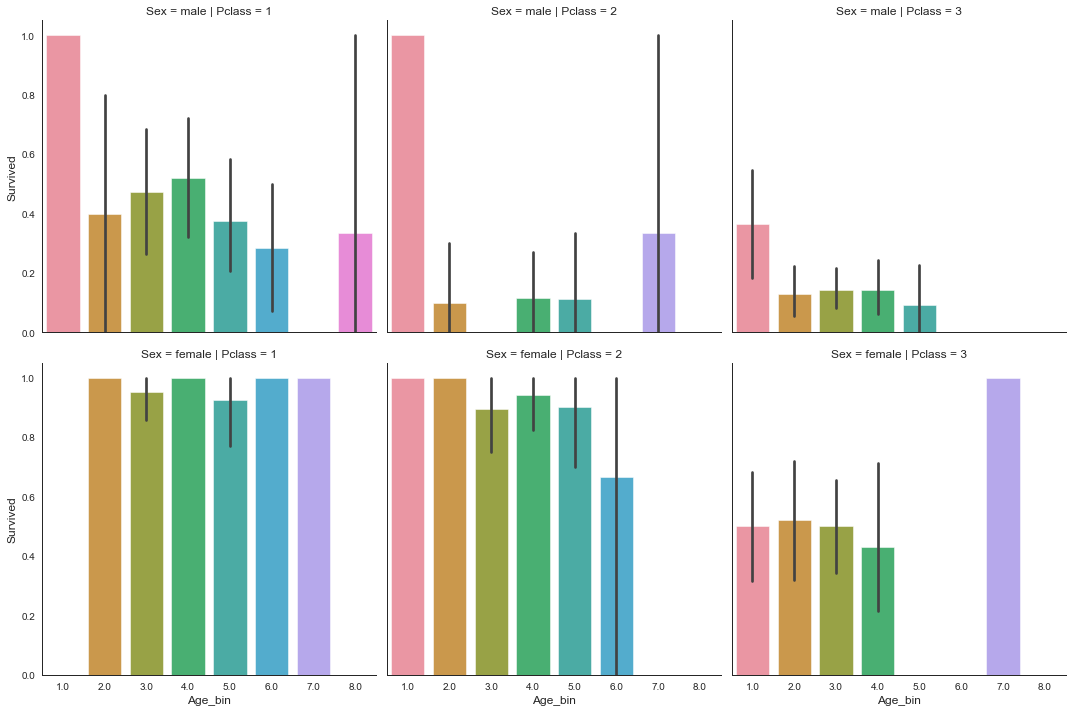

In [33]:
sns.factorplot('Age_bin','Survived', col='Pclass' , row = 'Sex',kind="bar", data=df)

In [34]:
pd.crosstab([df.Sex, df.Survived], [df.Age_bin, df.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

All female in Pclass 3 and Age_bin = 5 died

Males in Age_bin >= 2 and Pclass died more than survived or died greater than 50%

Females in Pclass 1 and 2 with siblings upto 3 nearly all survived

For Pclass 3 , males and females showed a near decreasing trend as number of siblings increased

For males, no survival rate above 0.5 for any values of SibSp(less than 50%)

In [35]:
pd.crosstab([df.Sex, df.Survived], [df.Parch, df.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

For males, all survival rates below 0.5 for any values of Parch, except for Parch = 2 and Pclass = 1

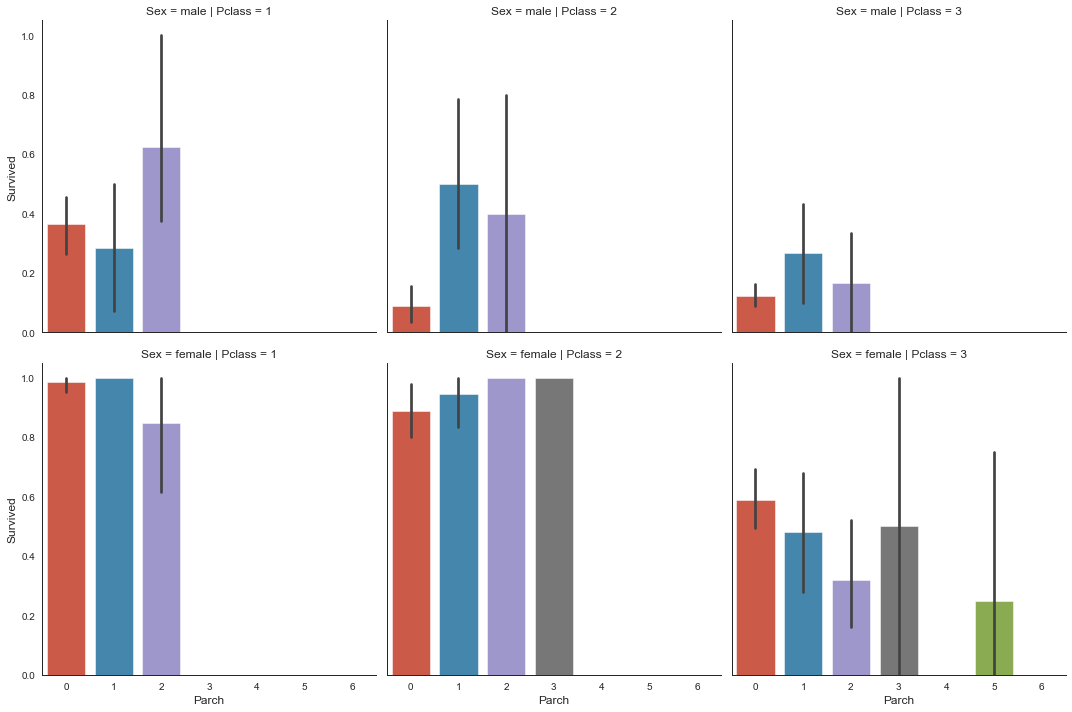

In [36]:
sns.factorplot('Parch', 'Survived', col='Pclass' , row = 'Sex', kind="bar", data=df )

# Age_bin , SibSp and Parch distribution

In [37]:
for x in [train, test , df]:
    x['Fare_bin']=np.nan
    for i in range(12,0,-1):
        x.loc[ df['Fare'] <= i*50, 'Fare_bin'] = i

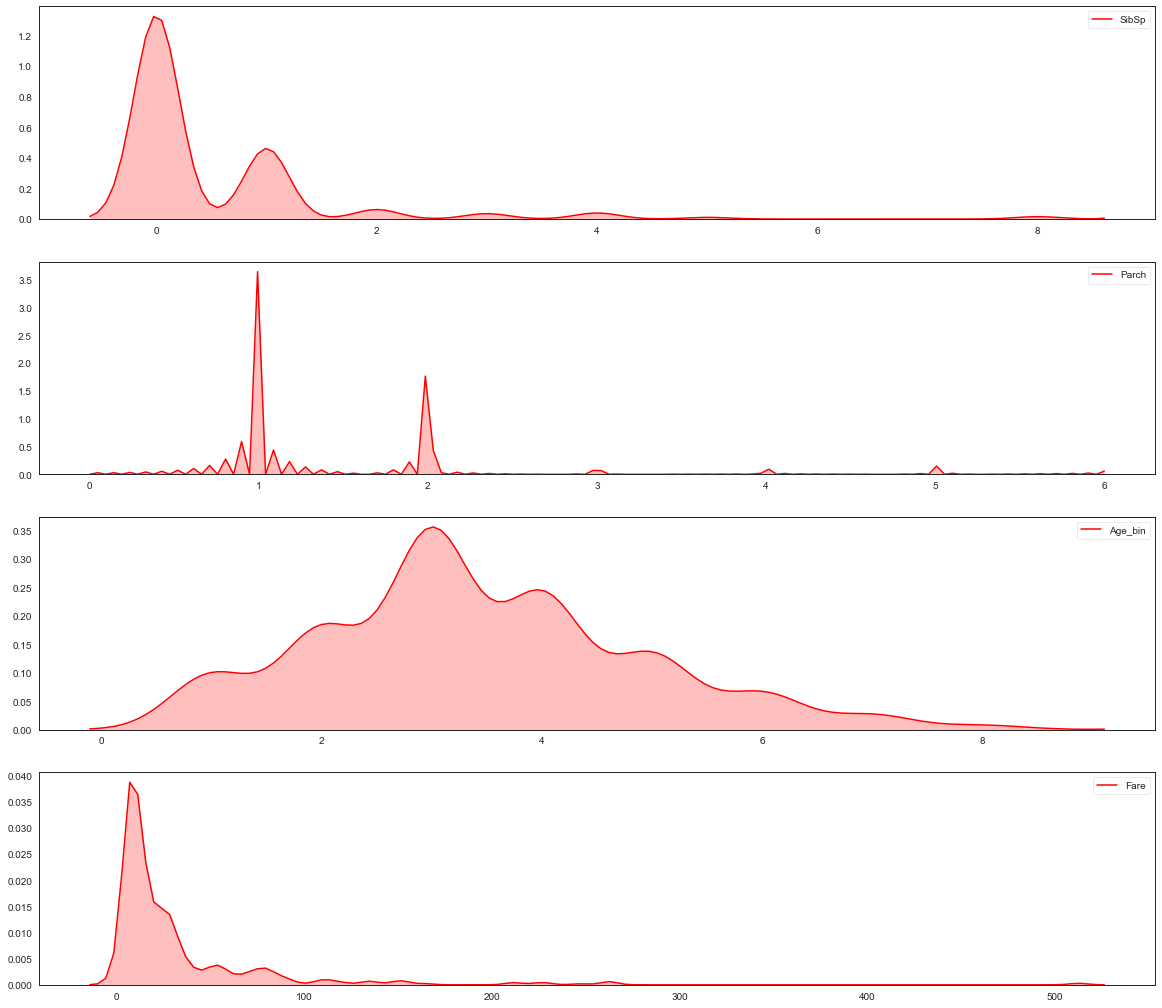

In [38]:
fig, axes = plt.subplots(4,1)
fig.set_size_inches(20, 18)
sns.kdeplot(df.SibSp , shade=True, color="red" , ax= axes[0])
sns.kdeplot(df.Parch , shade=True, color="red" , ax= axes[1])
sns.kdeplot(df.Age_bin , shade=True, color="red" , ax= axes[2])
sns.kdeplot(df.Fare , shade=True, color="red" , ax= axes[3])
plt.show()

Maximum people are travelling with no siblings 

More people were travelling with only their 1 parent rather than 2 

Maximum population on the ship was aged between 15 yrs to 50 yrs

Most of the people only paid upto 50 as their fare

In [39]:
# introducing Fare_bin the same way as done in the Age_bin above but with a gap of 50

In [40]:
df[["Fare" , "Fare_bin"]].head(10)

,Fare,Fare_bin
0,7.2500,1.0
1,71.2833,2.0
2,7.9250,1.0
3,53.1000,2.0
4,8.0500,1.0
5,8.4583,1.0
6,51.8625,2.0
7,21.0750,1.0
8,11.1333,1.0
9,30.0708,1.0


In [41]:
pd.crosstab([df.Sex, df.Survived], [df.Fare_bin, df.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

In [42]:
df_test = test.copy()

In [43]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin,Fare_bin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,4.0,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,5.0,2.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,7.0,1.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,3.0,2.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3.0,1.0


In [44]:
df.drop(['PassengerId','Sex','Embarked','Name','Ticket', 'Cabin', 'Age', 'Fare'],axis=1,inplace=True)
df.head()

,Survived,Pclass,SibSp,Parch,Sex_bool,Embarked_bool,Age_bin,Fare_bin
0,0,3,1,0,1,0.0,3.0,1.0
1,1,1,1,0,0,1.0,4.0,2.0
2,1,3,0,0,0,0.0,3.0,1.0
3,1,1,1,0,0,0.0,4.0,2.0
4,0,3,0,0,1,0.0,4.0,1.0


In [45]:
context1 = {"female":0 , "male":1}
context2 = {"S":0 , "C":1 , "Q":2}
df_test['Sex_bool']=df_test.Sex.map(context1)
df_test["Embarked_bool"] = df_test.Embarked.map(context2)
df_test.drop(['PassengerId','Sex','Embarked','Name','Ticket', 'Cabin', 'Age', 'Fare'],axis=1,inplace=True)
df_test.head()

,Pclass,SibSp,Parch,Age_bin,Fare_bin,Sex_bool,Embarked_bool
0,3,0,0,4.0,1.0,1,2
1,3,1,0,5.0,2.0,0,0
2,2,0,0,7.0,1.0,1,2
3,3,0,0,3.0,2.0,1,0
4,3,1,1,3.0,1.0,0,0


In [46]:
df.isnull().sum()

Survived           0
Pclass             0
SibSp              0
Parch              0
Sex_bool           0
Embarked_bool      2
Age_bin          177
Fare_bin           0
dtype: int64

In [47]:
df_test.isnull().sum()

Pclass            0
SibSp             0
Parch             0
Age_bin          86
Fare_bin          0
Sex_bool          0
Embarked_bool     0
dtype: int64

Age_bin in both dataframes is still possessing null values

In [48]:
df_test.Age_bin.fillna(df_test.Age_bin.mean() , inplace=True)

In [49]:
df.Age_bin.fillna(df.Age_bin.mean() , inplace=True)

In [50]:
df.Embarked_bool.fillna(df.Embarked_bool.mean() , inplace=True)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), df['Survived'], test_size=0.3, random_state=101)

In [52]:
MLA = []
x = [LinearSVC() , DecisionTreeClassifier() , LogisticRegression() , KNeighborsClassifier() , GaussianNB() ,
    RandomForestClassifier() , GradientBoostingClassifier()]

X = ["LinearSVC" , "DecisionTreeClassifier" , "LogisticRegression" , "KNeighborsClassifier" , "GaussianNB" ,
    "RandomForestClassifier" , "GradientBoostingClassifier"]

for i in range(0,len(x)):
    model = x[i]
    model.fit( X_train , y_train )
    pred = model.predict(X_test)
    MLA.append(accuracy_score(pred , y_test))

In [53]:
MLA

[0.7761194029850746,
 0.8097014925373134,
 0.7761194029850746,
 0.7947761194029851,
 0.75,
 0.7910447761194029,
 0.8022388059701493]

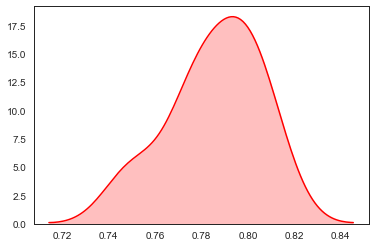

In [54]:
sns.kdeplot(MLA , shade=True, color="red")

This proves that much of the algorithms are giving the accuracy between 77% to 80% with some above 80%

In [55]:
d = { "Accuracy" : MLA , "Algorithm" : X }
dfm = pd.DataFrame(d)

In [56]:
dfm

,Accuracy,Algorithm
0,0.776119,LinearSVC
1,0.809701,DecisionTreeClassifier
2,0.776119,LogisticRegression
3,0.794776,KNeighborsClassifier
4,0.750000,GaussianNB
5,0.791045,RandomForestClassifier
6,0.802239,GradientBoostingClassifier


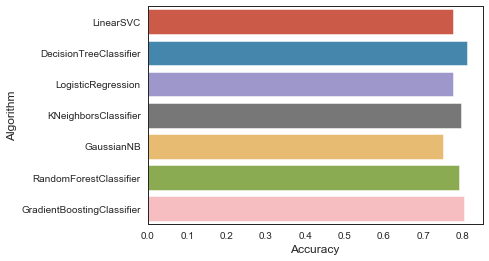

In [57]:
sns.barplot(x="Accuracy", y="Algorithm", data=dfm)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), df['Survived'], test_size=0.3, random_state=66)
model = KNeighborsClassifier(n_neighbors=6)
model.fit( X_train , y_train )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [59]:
pred = model.predict(X_test)

In [60]:
answer = model.predict(df_test)

In [61]:
print(accuracy_score(pred , y_test))

0.8507462686567164


### Accuracy turns out to be 85.074 % with n-neighbors = 6

In [62]:
KNNaccu = []
Neighbours = []

for neighbour in range(1,31):
    model = KNeighborsClassifier(n_neighbors=neighbour)
    model.fit( X_train , y_train )
    pred = model.predict(X_test)
    KNNaccu.append(accuracy_score(pred , y_test))
    Neighbours.append(neighbour)

In [63]:
d = { "Neighbours" : Neighbours , "Accuracy" : KNNaccu }
knndf = pd.DataFrame(d)

In [64]:
knndf.head()

,Neighbours,Accuracy
0,1,0.809701
1,2,0.828358
2,3,0.832090
3,4,0.847015
4,5,0.832090


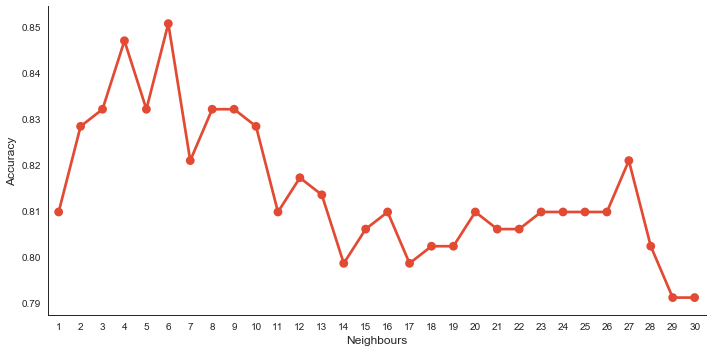

In [65]:
sns.factorplot(x="Neighbours", y="Accuracy",size = 5 , aspect = 2 , data=knndf)

###  For Neighbours = 6 , the accuracy is the maximum 